In [42]:
import pandas as pd
import os

# CGM 데이터가 저장된 디렉토리 경로
cgm_directory = 'path_to_cgm_data'  # 예: './cgm_data'

# CGM 파일 병합을 위한 빈 리스트 생성
cgm_data_list = []

# 디렉토리 내 모든 파일 읽기
for file_name in os.listdir(cgm_directory):
    if file_name.endswith('.xlsx'):  # .xlsx 파일만 선택
        # 파일에서 참가자 ID 추출 (예: participant_001.xlsx -> 001)
        subject_id = file_name.split('_')[1].split('.')[0]
        
        # CGM 데이터 읽기
        file_path = os.path.join(cgm_directory, file_name)
        cgm_data = pd.read_excel(file_path)
        
        # 참가자 ID 열 추가
        cgm_data['Subject_ID'] = subject_id
        
        # 리스트에 추가
        cgm_data_list.append(cgm_data)

# 병합된 CGM 데이터프레임 생성
merged_cgm_data = pd.concat(cgm_data_list, ignore_index=True)

# Device_Timestamp를 datetime 형식으로 변환
merged_cgm_data['Device_Timestamp'] = pd.to_datetime(merged_cgm_data['Device_Timestamp'])

print(merged_cgm_data.head())  # 병합된 CGM 데이터 확인


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_cgm_data'

In [44]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import os

# 엑셀 파일이 있는 디렉토리 경로
directory_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/CGM/Participants"

# 데이터를 저장할 빈 리스트
dataframes = []

# 디렉토리 내 모든 엑셀 파일 처리
for file_name in os.listdir(directory_path):
    if file_name.endswith(".xlsx") or file_name.endswith(".xls"):
        file_path = os.path.join(directory_path, file_name)
        
        try:
            # 엑셀 파일 읽기 (openpyxl 또는 xlrd 엔진 사용)
            if file_name.endswith(".xlsx"):
                df = pd.read_excel(file_path, engine="openpyxl")
            else:
                df = pd.read_excel(file_path, engine="xlrd")
            
            # 파일 이름에서 ID 추출 (파일 이름이 숫자로 시작한다고 가정)
            participant_id = int(file_name.split('_')[0]) if '_' in file_name else int(file_name.split('.')[0])
            
            # 필요한 컬럼만 선택 (Device Timestamp, Historic Glucose mg/dL)
            # 여기에서 실제 파일의 컬럼 이름을 확인하고 변경해야 합니다
            selected_columns = df[["Device Timestamp", "Historic Glucose mg/dL"]]
            
            # ID 열 추가
            selected_columns.insert(0, "ID", participant_id)
            
            # 리스트에 추가
            dataframes.append(selected_columns)
        except Exception as e:
            print(f"파일 {file_name} 처리 중 오류 발생: {e}")

# 모든 데이터프레임 합치기
merged_data = pd.concat(dataframes, ignore_index=True)

# 합쳐진 데이터셋을 저장 (선택 사항)
merged_data.to_excel("merged_dataset.xlsx", index=False, engine="openpyxl")

print("데이터가 성공적으로 합쳐졌습니다.")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/CGM/Participants'

In [ ]:
print(merged_data.head()) 

In [ ]:

# 합쳐진 데이터셋을 저장 (파일들을 읽어왔던 폴더에 저장)
output_path = os.path.join(directory_path, "merged_dataset.xlsx")
merged_data.to_excel(output_path, index=False, engine="openpyxl")

In [ ]:
import pandas as pd
import os

# 엑셀 파일이 있는 디렉토리 경로
directory_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/CGM/Participants"

# 데이터를 저장할 빈 리스트
dataframes = []

# 디렉토리 내 모든 엑셀 파일 처리
for file_name in os.listdir(directory_path):
    if file_name.endswith(".xlsx") or file_name.endswith(".xls"):
        file_path = os.path.join(directory_path, file_name)
        print(f"Processing file: {file_name}")
        
        try:
            # 엑셀 파일 읽기 (openpyxl 또는 xlrd 엔진 사용)
            if file_name.endswith(".xlsx"):
                df = pd.read_excel(file_path, engine="openpyxl")
            else:
                df = pd.read_excel(file_path, engine="xlrd")
            
            # 파일 이름에서 ID 추출 (파일 이름이 숫자로 시작한다고 가정)
            participant_id = int(file_name.split('_')[0]) if '_' in file_name else int(file_name.split('.')[0])
            
            # 필요한 컬럼만 선택 (Device Timestamp, Historic Glucose mg/dL)
            # 컬럼 이름 확인을 위해 출력
            print(f"Columns in {file_name}: {df.columns.tolist()}")
            selected_columns = df[["Device Timestamp", "Historic Glucose mg/dL"]]
            
            # ID 열 추가
            selected_columns.insert(0, "ID", participant_id)
            
            # 리스트에 추가
            dataframes.append(selected_columns)
        except Exception as e:
            print(f"파일 {file_name} 처리 중 오류 발생: {e}")

# 모든 데이터프레임 합치기
if dataframes:
    merged_data = pd.concat(dataframes, ignore_index=True)
    # 합쳐진 데이터셋을 저장 (파일들을 읽어왔던 폴더에 저장)
    output_path = os.path.join(directory_path, "merged_dataset.xlsx")
    merged_data.to_excel(output_path, index=False, engine="openpyxl")
    print(f"데이터가 성공적으로 합쳐졌습니다. 파일이 다음 경로에 저장되었습니다: {output_path}")
else:
    print("처리할 데이터가 없습니다.")


In [ ]:
print(merged_data.tail()) 

In [ ]:
print(f"Processing file: {file_name}")


In [53]:
# 파일의 모든 컬럼 이름 확인
print(f"Columns in {file_name}: {df.columns.tolist()}")


NameError: name 'file_name' is not defined

In [44]:
import pandas as pd
import os

# 엑셀 파일이 있는 디렉토리 경로
directory_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/CGM/Participants"

# 데이터를 저장할 빈 리스트
dataframes = []

# 디렉토리 내 모든 엑셀 파일 처리
for file_name in os.listdir(directory_path):
    if file_name.endswith(".xlsx") or file_name.endswith(".xls"):
        file_path = os.path.join(directory_path, file_name)
        print(f"Processing file: {file_name}")
        
        try:
            # 엑셀 파일 읽기
            if file_name.endswith(".xlsx"):
                df = pd.read_excel(file_path, engine="openpyxl")
            else:
                df = pd.read_excel(file_path, engine="xlrd")
            
            # 빈 파일 건너뛰기
            if df.empty:
                print(f"File {file_name} is empty. Skipping...")
                continue
            
            # 컬럼 이름 확인
            print(f"Columns in {file_name}: {df.columns.tolist()}")
            
            # 필요한 컬럼 이름 확인 및 수정
            if "Device Timestamp" not in df.columns or "Historic Glucose mg/dL" not in df.columns:
                df.rename(columns={
                    "기기 시간": "Device Timestamp", 
                    "글루코스 mg/dL": "Historic Glucose mg/dL"
                }, inplace=True)
            
            # 필요한 컬럼만 선택
            selected_columns = df[["Device Timestamp", "Historic Glucose mg/dL"]]
            
            # 파일 이름에서 ID 추출
            participant_id = int(file_name.split('_')[0])
            selected_columns.insert(0, "ID", participant_id)
            
            # 데이터 확인
            print(f"Data sample from {file_name}:\n{selected_columns.head()}")
            
            # 리스트에 추가
            dataframes.append(selected_columns)
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

# 모든 데이터프레임 합치기
if dataframes:
    merged_data = pd.concat(dataframes, ignore_index=True)
    # ID 및 Device Timestamp 기준으로 정렬
    merged_data.sort_values(by=["ID", "Device Timestamp"], inplace=True)
    
    # 합쳐진 데이터셋 저장
    output_path = os.path.join(directory_path, "merged_dataset.xlsx")
    merged_data.to_excel(output_path, index=False, engine="openpyxl")
    print(f"Data successfully merged and saved to: {output_path}")
else:
    print("No data to merge.")



Processing file: ~$3_ThreeParticipant_glucose_10-25-2022.xlsx
Error processing ~$3_ThreeParticipant_glucose_10-25-2022.xlsx: File is not a zip file
Processing file: 3_ThreeParticipant_glucose_10-25-2022.xlsx
Columns in 3_ThreeParticipant_glucose_10-25-2022.xlsx: ['Device', 'Serial Number', 'Device Timestamp', 'Record Type', 'Historic Glucose mg/dL', 'Scan Glucose mg/dL', 'Non-numeric Rapid-Acting Insulin', 'Rapid-Acting Insulin (units)', 'Non-numeric Food', 'Carbohydrates (grams)', 'Carbohydrates (servings)', 'Non-numeric Long-Acting Insulin', 'Long-Acting Insulin (units)', 'Notes', 'Strip Glucose mg/dL', 'Ketone mmol/L', 'Meal Insulin (units)', 'Correction Insulin (units)', 'User Change Insulin (units)']
Data sample from 3_ThreeParticipant_glucose_10-25-2022.xlsx:
   ID    Device Timestamp  Historic Glucose mg/dL
0   3 2022-10-18 04:59:00                      40
1   3 2022-10-18 05:14:00                      40
2   3 2022-10-18 05:29:00                      40
3   3 2022-10-18 06:44:0

In [45]:
print(merged_data.tail())

     ID    Device Timestamp  Historic Glucose mg/dL
332   3 2022-10-21 16:59:00                     103
333   3 2022-10-21 17:14:00                     109
334   3 2022-10-21 17:29:00                     106
335   3 2022-10-21 17:44:00                      96
336   3 2022-10-21 17:59:00                      92


In [46]:
print(merged_data.head())

     ID    Device Timestamp  Historic Glucose mg/dL
730   1 2022-10-05 17:04:00                      83
731   1 2022-10-05 17:19:00                      93
732   1 2022-10-05 17:34:00                      94
733   1 2022-10-05 17:49:00                      87
734   1 2022-10-05 18:04:00                      78


In [50]:
import pandas as pd

# EMA 데이터 로드
ema_file_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/EMA/Ethica_SurveyData.xlsx"
ema_data = pd.read_excel(ema_file_path, engine="openpyxl")

# 컬럼 스케일링 함수 정의
def scale_values(value, scale_type):
    if scale_type == "binary":  # bored, hungry 컬럼 (No=1, Yes=2)
        return (value - 1) / 1  # 1 -> 0, 2 -> 1
    elif scale_type == "4-point":  # 나머지 컬럼 (1~4 스케일링)
        return (value - 1) / 3  # 1 -> 0, 4 -> 1
    else:
        return value

# 스케일링 대상 컬럼 정의
binary_columns = ["bored", "hungry"]
point_scale_columns = [
    "How_happy", "How_cheerful", "How_relaxed", "How_stressed", "How_anxious", 
    "How_angry", "How_sad", "How_energetic", "How_tired", "How_lonely", "DailyAvgLoneliness"
]

# 각 컬럼 스케일링 적용
for col in binary_columns:
    ema_data[col] = pd.to_numeric(ema_data[col], errors='coerce').apply(lambda x: scale_values(x, "binary"))

for col in point_scale_columns:
    ema_data[col] = pd.to_numeric(ema_data[col], errors='coerce').apply(lambda x: scale_values(x, "4-point"))

# 날짜 컬럼에서 요일 추출하여 새로운 컬럼 추가
# 날짜 컬럼 이름이 "Response_Time"이라고 가정
if "Response_Time" in ema_data.columns:
    ema_data["Response_Time"] = pd.to_datetime(ema_data["Response_Time"], errors='coerce')
    if ema_data["Response_Time"].isnull().all():
        print("All dates in Response_Time could not be converted. Check the format of the dates.")
    else:
        ema_data["Weekday"] = ema_data["Response_Time"].dt.dayofweek  # Monday=0, Sunday=6
else:
    print("Response_Time column not found. Ensure the date column is named 'Response_Time'.")

# 스케일링 및 요일 컬럼 추가된 데이터 저장
output_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/EMA/scaled_ema_data.xlsx"
ema_data.to_excel(output_path, index=False, engine="openpyxl")

print(f"Scaled EMA data with weekdays added has been saved to: {output_path}")


/opt/anaconda3/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname MST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/opt/anaconda3/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname MDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


AttributeError: Can only use .dt accessor with datetimelike values

In [51]:
import pandas as pd

# EMA 데이터 로드
ema_file_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/EMA/Ethica_SurveyData.xlsx"
ema_data = pd.read_excel(ema_file_path, engine="openpyxl")

# 컬럼 스케일링 함수 정의
def scale_values(value, scale_type):
    if scale_type == "binary":  # bored, hungry 컬럼 (No=1, Yes=2)
        return (value - 1) / 1  # 1 -> 0, 2 -> 1
    elif scale_type == "4-point":  # 나머지 컬럼 (1~4 스케일링)
        return (value - 1) / 3  # 1 -> 0, 4 -> 1
    else:
        return value

# 스케일링 대상 컬럼 정의
binary_columns = ["bored", "hungry"]
point_scale_columns = [
    "How_happy", "How_cheerful", "How_relaxed", "How_stressed", "How_anxious", 
    "How_angry", "How_sad", "How_energetic", "How_tired", "How_lonely", "DailyAvgLoneliness"
]

# 각 컬럼 스케일링 적용
for col in binary_columns:
    ema_data[col] = pd.to_numeric(ema_data[col], errors='coerce').apply(lambda x: scale_values(x, "binary"))

for col in point_scale_columns:
    ema_data[col] = pd.to_numeric(ema_data[col], errors='coerce').apply(lambda x: scale_values(x, "4-point"))

# 날짜 컬럼에서 요일 추출하여 새로운 컬럼 추가
# 날짜 컬럼 이름이 "Response_Time"이라고 가정
if "Response_Time" in ema_data.columns:
    ema_data["Response_Time"] = pd.to_datetime(ema_data["Response_Time"].str[:-4], errors='coerce')  # CDT 제거
    if ema_data["Response_Time"].isnull().all():
        print("All dates in Response_Time could not be converted. Check the format of the dates.")
    else:
        ema_data = ema_data[ema_data["Response_Time"].notnull()]  # 유효한 날짜만 필터링
        ema_data["Weekday"] = ema_data["Response_Time"].dt.dayofweek  # Monday=0, Sunday=6
else:
    print("Response_Time column not found. Ensure the date column is named 'Response_Time'.")

# 스케일링 및 요일 컬럼 추가된 데이터 저장
output_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/EMA/scaled_ema_data.xlsx"
ema_data.to_excel(output_path, index=False, engine="openpyxl")

print(f"Scaled EMA data with weekdays added has been saved to: {output_path}")


Scaled EMA data with weekdays added has been saved to: /Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/EMA/scaled_ema_data.xlsx


In [52]:
print(ema_data.head())


   Study ID   Name          DeviceID           Scheduled_Time Scheduled_Date  \
0       1.0  60644  542f4997be9f0da7  2022-10-06 08:10:53 CDT     2022-10-06   
1       2.0  60644  542f4997be9f0da7  2022-10-08 13:30:14 CDT     2022-10-08   
2       3.0  60644  542f4997be9f0da7  2022-10-08 14:55:43 CDT     2022-10-08   
3       7.0  60644  542f4997be9f0da7  2022-10-08 17:10:29 CDT     2022-10-08   
4       8.0  60644  542f4997be9f0da7  2022-10-08 18:45:54 CDT     2022-10-08   

       IssuedTime_New              Issued_Time Issued_Date  \
0 2022-10-06 08:10:58  2022-10-06 08:10:58 CDT  2022-10-06   
1 2022-10-08 13:30:19  2022-10-08 13:30:19 CDT  2022-10-08   
2 2022-10-08 14:55:48  2022-10-08 14:55:48 CDT  2022-10-08   
3 2022-10-08 17:10:34  2022-10-08 17:10:34 CDT  2022-10-08   
4 2022-10-08 18:45:59  2022-10-08 18:45:59 CDT  2022-10-08   

                 Time       Response_Time  ... How_stressed How_anxious  \
0 2022-10-06 08:11:56 2022-10-06 08:11:56  ...     0.333333    0.333333

In [53]:
print(ema_data.tail(9))

      Study ID   Name                          DeviceID  \
4924       NaN  71316  D3B8E6617F6C4719A0DBCED15399C919   
4925       NaN  71316  D3B8E6617F6C4719A0DBCED15399C919   
4926       NaN  71316  D3B8E6617F6C4719A0DBCED15399C919   
4927       NaN  71316  D3B8E6617F6C4719A0DBCED15399C919   
4928       NaN  71316  D3B8E6617F6C4719A0DBCED15399C919   
4929       NaN  71316  D3B8E6617F6C4719A0DBCED15399C919   
4930       NaN  71316  D3B8E6617F6C4719A0DBCED15399C919   
4931       NaN  71316  D3B8E6617F6C4719A0DBCED15399C919   
4932       NaN  71316  D3B8E6617F6C4719A0DBCED15399C919   

               Scheduled_Time Scheduled_Date      IssuedTime_New  \
4924  2023-05-08 18:57:14 CDT     2023-05-08 2023-05-08 18:57:14   
4925  2023-05-09 08:53:42 CDT     2023-05-09 2023-05-09 08:53:42   
4926  2023-05-09 11:01:03 CDT     2023-05-09 2023-05-09 11:01:03   
4927  2023-05-09 15:10:07 CDT     2023-05-09 2023-05-09 15:10:07   
4928  2023-05-09 19:01:39 CDT     2023-05-09 2023-05-09 19:01:39   
4

In [55]:
print(ema_data)

      Study ID   Name                          DeviceID  \
0          1.0  60644                  542f4997be9f0da7   
1          2.0  60644                  542f4997be9f0da7   
2          3.0  60644                  542f4997be9f0da7   
3          7.0  60644                  542f4997be9f0da7   
4          8.0  60644                  542f4997be9f0da7   
...        ...    ...                               ...   
4928       NaN  71316  D3B8E6617F6C4719A0DBCED15399C919   
4929       NaN  71316  D3B8E6617F6C4719A0DBCED15399C919   
4930       NaN  71316  D3B8E6617F6C4719A0DBCED15399C919   
4931       NaN  71316  D3B8E6617F6C4719A0DBCED15399C919   
4932       NaN  71316  D3B8E6617F6C4719A0DBCED15399C919   

               Scheduled_Time Scheduled_Date      IssuedTime_New  \
0     2022-10-06 08:10:53 CDT     2022-10-06 2022-10-06 08:10:58   
1     2022-10-08 13:30:14 CDT     2022-10-08 2022-10-08 13:30:19   
2     2022-10-08 14:55:43 CDT     2022-10-08 2022-10-08 14:55:48   
3     2022-10-08 17

In [55]:
ema_data

NameError: name 'ema_data' is not defined

In [59]:
# 필요한 컬럼만 유지 및 StudyID를 가장 왼쪽으로 이동
columns_to_keep = [
    "StudyID", "Response_Time", "bored", "hungry", "How_happy", "How_cheerful", "How_relaxed", 
    "How_stressed", "How_anxious", "How_angry", "How_sad", "How_energetic", 
    "How_tired", "How_lonely", "DailyAvgLoneliness", "Weekday"
]
ema_data = ema_data[columns_to_keep]


In [60]:
ema_data

,StudyID,Response_Time,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,How_sad,How_energetic,How_tired,How_lonely,DailyAvgLoneliness,Weekday
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,0.000000,0.666667,0.333333,0.0,0.0,3
1,1,2022-10-08 13:31:07,0.0,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,5
2,1,2022-10-08 14:56:29,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.666667,0.000000,0.0,0.0,5
3,1,2022-10-08 17:12:48,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.333333,0.0,0.000000,1.000000,0.333333,0.0,0.0,5
4,1,2022-10-08 18:46:33,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,0.000000,0.666667,0.000000,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,89,2023-05-09 19:16:58,0.0,0.0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.666667,0.0,0.0,1
4929,89,2023-04-29 11:26:55,0.0,1.0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.666667,0.0,0.0,5
4930,89,2023-05-10 10:19:11,0.0,0.0,1.000000,0.666667,0.666667,0.333333,0.333333,0.0,0.000000,0.333333,0.333333,0.0,0.0,2
4931,89,2023-05-10 11:17:05,0.0,0.0,1.000000,1.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.666667,0.333333,0.0,0.0,2


In [61]:
# 스케일링 및 요일 컬럼 추가된 데이터 저장
output_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/EMA/scaled_ema_data.xlsx"
ema_data.to_excel(output_path, index=False, engine="openpyxl")

In [62]:
ema_data

,StudyID,Response_Time,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,How_sad,How_energetic,How_tired,How_lonely,DailyAvgLoneliness,Weekday
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,0.000000,0.666667,0.333333,0.0,0.0,3
1,1,2022-10-08 13:31:07,0.0,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,5
2,1,2022-10-08 14:56:29,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.666667,0.000000,0.0,0.0,5
3,1,2022-10-08 17:12:48,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.333333,0.0,0.000000,1.000000,0.333333,0.0,0.0,5
4,1,2022-10-08 18:46:33,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,0.000000,0.666667,0.000000,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,89,2023-05-09 19:16:58,0.0,0.0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.666667,0.0,0.0,1
4929,89,2023-04-29 11:26:55,0.0,1.0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.666667,0.0,0.0,5
4930,89,2023-05-10 10:19:11,0.0,0.0,1.000000,0.666667,0.666667,0.333333,0.333333,0.0,0.000000,0.333333,0.333333,0.0,0.0,2
4931,89,2023-05-10 11:17:05,0.0,0.0,1.000000,1.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.666667,0.333333,0.0,0.0,2


In [63]:
# ID 및 Response_Time 기준으로 정렬
ema_data.sort_values(by=["StudyID", "Response_Time"], inplace=True)
ema_data

,StudyID,Response_Time,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,How_sad,How_energetic,How_tired,How_lonely,DailyAvgLoneliness,Weekday
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,0.000000,0.666667,0.333333,0.0,0.0,3
5,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,0.000000,0.666667,0.000000,0.0,0.0,3
9,1,2022-10-06 15:39:36,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.333333,0.0,0.000000,0.666667,0.000000,0.0,0.0,3
15,1,2022-10-06 16:28:38,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,0.000000,0.666667,0.000000,0.0,0.0,3
21,1,2022-10-06 18:23:32,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,89,2023-05-09 15:28:26,0.0,0.0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,0.000000,0.666667,0.333333,0.0,0.0,1
4928,89,2023-05-09 19:16:58,0.0,0.0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.666667,0.0,0.0,1
4930,89,2023-05-10 10:19:11,0.0,0.0,1.000000,0.666667,0.666667,0.333333,0.333333,0.0,0.000000,0.333333,0.333333,0.0,0.0,2
4931,89,2023-05-10 11:17:05,0.0,0.0,1.000000,1.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.666667,0.333333,0.0,0.0,2


In [64]:

# 스케일링 및 요일 컬럼 추가된 데이터 저장
output_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/EMA/BG_EMA/scaled_ema_data.xlsx"
ema_data.to_excel(output_path, index=False, engine="openpyxl")

In [57]:
import pandas as pd
import numpy as np

# EMA 데이터 로드
ema_file_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/BG_scaled_ema_data.xlsx"
cgm_file_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/merged_dataset.xlsx"

ema_data = pd.read_excel(ema_file_path, engine="openpyxl")
cgm_data = pd.read_excel(cgm_file_path, engine="openpyxl")

# Response_Time과 Timestamp를 datetime 형식으로 변환
ema_data["Timestamp"] = pd.to_datetime(ema_data["Timestamp"], errors='coerce')
cgm_data["Timestamp"] = pd.to_datetime(cgm_data["Timestamp"], errors='coerce')

# StudyID 컬럼 이름 확인 및 정규화
if "StudyID" not in cgm_data.columns:
    cgm_data.rename(columns={"ID": "StudyID"}, inplace=True)

if "StudyID" not in ema_data.columns:
    raise KeyError("The EMA dataset does not contain the 'StudyID' column. Ensure the column is named correctly.")

# 결과를 저장할 리스트
data_merged = []

# StudyID별로 EMA와 CGM 데이터를 병합
for study_id in ema_data["StudyID"].unique():
    ema_subset = ema_data[ema_data["StudyID"] == study_id]
    cgm_subset = cgm_data[cgm_data["StudyID"] == study_id]

    if cgm_subset.empty:
        print(f"No CGM data found for StudyID: {study_id}")
        continue

    for _, ema_row in ema_subset.iterrows():
        # EMA의 Response_Time에 가장 가까운 CGM의 Timestamp 찾기
        closest_cgm_idx = (cgm_subset["Timestamp"] - ema_row["Timestamp"]).abs().idxmin()
        closest_cgm = cgm_subset.loc[closest_cgm_idx]
        
        # EMA와 CGM 데이터 병합
        merged_row = {
            **ema_row.to_dict(),
            "Closest CGM Timestamp": closest_cgm["Timestamp"],
            "Glucose mg/dL": closest_cgm["Historic Glucose mg/dL"]
        }
        data_merged.append(merged_row)

# 병합된 데이터를 데이터프레임으로 변환
merged_data = pd.DataFrame(data_merged)

# 병합된 데이터 저장
output_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/merged_ema_cgm_data.xlsx"
merged_data.to_excel(output_path, index=False, engine="openpyxl")

print(f"Merged EMA and CGM data has been saved to: {output_path}")
merged_data

FileNotFoundError: [Errno 2] No such file or directory: '/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/BG_scaled_ema_data.xlsx'

In [70]:
# StudyID별 행 개수 확인
studyid_counts = merged_data["StudyID"].value_counts()
print("\nNumber of rows per StudyID:")
print(studyid_counts)


Number of rows per StudyID:
2    71
1    62
3    62
Name: StudyID, dtype: int64


In [59]:
import pandas as pd
import numpy as np

# EMA 데이터 로드
ema_file_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/BG_scaled_ema_data.xlsx"
cgm_file_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/merged_dataset.xlsx"

ema_data = pd.read_excel(ema_file_path, engine="openpyxl")
cgm_data = pd.read_excel(cgm_file_path, engine="openpyxl")

# Response_Time과 Timestamp를 datetime 형식으로 변환
ema_data["Timestamp"] = pd.to_datetime(ema_data["Timestamp"], errors='coerce')
cgm_data["Timestamp"] = pd.to_datetime(cgm_data["Timestamp"], errors='coerce')

# StudyID 컬럼 이름 확인 및 정규화
if "StudyID" not in cgm_data.columns:
    cgm_data.rename(columns={"ID": "StudyID"}, inplace=True)

if "StudyID" not in ema_data.columns:
    raise KeyError("The EMA dataset does not contain the 'StudyID' column. Ensure the column is named correctly.")

# 결과를 저장할 리스트
data_merged = []

# StudyID별로 EMA와 CGM 데이터를 병합
for study_id in ema_data["StudyID"].unique():
    ema_subset = ema_data[ema_data["StudyID"] == study_id]
    cgm_subset = cgm_data[cgm_data["StudyID"] == study_id]

    if cgm_subset.empty:
        print(f"No CGM data found for StudyID: {study_id}")
        continue

    for _, ema_row in ema_subset.iterrows():
        # EMA의 Response_Time에 가장 가까운 CGM의 Timestamp 찾기
        closest_cgm_idx = (cgm_subset["Timestamp"] - ema_row["Timestamp"]).abs().idxmin()
        closest_cgm = cgm_subset.loc[closest_cgm_idx]
        
        # 30분, 60분, 90분 이후 CGM 값 계산
        time_ranges = [30, 60, 90]  # 분 단위
        cgm_stats = {}
        for time_range in time_ranges:
            start_time = ema_row["Timestamp"]
            end_time = ema_row["Timestamp"] + pd.Timedelta(minutes=time_range)
            cgm_within_range = cgm_subset[(cgm_subset["Timestamp"] >= start_time) & (cgm_subset["Timestamp"] <= end_time)]
            
            cgm_stats[f"CGM_{time_range}min_mean"] = cgm_within_range["Historic Glucose mg/dL"].mean()
            cgm_stats[f"CGM_{time_range}min_max"] = cgm_within_range["Historic Glucose mg/dL"].max()
            cgm_stats[f"CGM_{time_range}min_sd"] = cgm_within_range["Historic Glucose mg/dL"].std()
        
        # EMA와 CGM 데이터 병합
        merged_row = {
            **ema_row.to_dict(),
            "Closest CGM Timestamp": closest_cgm["Timestamp"],
            "Glucose mg/dL": closest_cgm["Historic Glucose mg/dL"],
            **cgm_stats
        }
        data_merged.append(merged_row)

# 병합된 데이터를 데이터프레임으로 변환
merged_data = pd.DataFrame(data_merged)

# StudyID별 행 개수 확인
studyid_counts = merged_data["StudyID"].value_counts()
print("\nNumber of rows per StudyID:")
print(studyid_counts)

# 병합된 데이터 저장
output_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/merged_ema_cgm_data_with_stats.xlsx"
merged_data.to_excel(output_path, index=False, engine="openpyxl")

print(f"Merged EMA and CGM data with stats has been saved to: {output_path}")

# 저장된 데이터의 Head와 Tail 확인
print("\nHead of the merged EMA-CGM data:")
print(merged_data.head())

print("\nTail of the merged EMA-CGM data:")
print(merged_data.tail())


FileNotFoundError: [Errno 2] No such file or directory: '/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/BG_scaled_ema_data.xlsx'

In [74]:
merged_data

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,Glucose mg/dL,CGM_30min_mean,CGM_30min_max,CGM_30min_sd,CGM_60min_mean,CGM_60min_max,CGM_60min_sd,CGM_90min_mean,CGM_90min_max,CGM_90min_sd
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,98,90.5,98.0,10.606602,88.50,98.0,6.658328,88.000000,98.0,5.253570
1,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,90,91.0,96.0,7.071068,97.75,106.0,8.883505,99.500000,106.0,7.503333
2,1,2022-10-06 15:39:36,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.333333,0.0,...,103,108.5,109.0,0.707107,105.75,109.0,3.304038,105.333333,109.0,2.658320
3,1,2022-10-06 16:28:38,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,104,104.5,105.0,0.707107,104.25,105.0,0.500000,104.166667,106.0,1.329160
4,1,2022-10-06 18:23:32,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,98,100.0,105.0,7.071068,95.50,105.0,6.806859,95.833333,105.0,5.382069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,3,2022-10-24 13:17:55,0.0,0.0,0.333333,0.333333,0.000000,0.000000,0.000000,0.0,...,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,3,2022-10-24 14:15:11,0.0,0.0,0.333333,0.333333,0.000000,0.000000,0.000000,0.0,...,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,3,2022-10-24 17:23:35,0.0,1.0,0.666667,0.333333,0.666667,0.000000,0.000000,0.0,...,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,3,2022-10-24 19:46:38,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
import pandas as pd
import os

# CGM 데이터 로드 경로 설정
directory_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/CGM/CGM_all"

# 결과를 저장할 빈 리스트
cgm_data_list = []

# 디렉토리 내 모든 CSV 파일 처리
for file_name in os.listdir(directory_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(directory_path, file_name)
        study_id = int(file_name.split('_')[0])  # 파일 이름에서 StudyID 추출

        # CSV 파일 읽기
        df = pd.read_csv(file_path)

        # 필요한 컬럼만 선택 및 컬럼 이름 변경
        df = df.rename(columns={
            "subjectid": "StudyID",
            "timestamp": "Timestamp",
            "sensorglucose": "Glucose mg/dL"
        })

        # StudyID 추가
        df["StudyID"] = study_id

        # 리스트에 추가
        cgm_data_list.append(df)

# 모든 데이터프레임을 하나로 병합
merged_cgm_data = pd.concat(cgm_data_list, ignore_index=True)

# Timestamp 컬럼을 datetime 형식으로 변환
merged_cgm_data["Timestamp"] = pd.to_datetime(merged_cgm_data["Timestamp"], errors='coerce')

# Timestamp 기준으로 정렬
merged_cgm_data = merged_cgm_data.sort_values(by=["StudyID", "Timestamp"], ascending=[True, True])

# 병합된 데이터 저장
output_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/CGM/merged_cgm_data.xlsx"
merged_cgm_data.to_excel(output_path, index=False, engine="openpyxl")

print(f"Merged CGM data has been saved to: {output_path}")

# 저장된 데이터의 Head와 Tail 확인
print("\nHead of the merged CGM data:")
print(merged_cgm_data.head())

print("\nTail of the merged CGM data:")
print(merged_cgm_data.tail())


FileNotFoundError: [Errno 2] No such file or directory: '/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/CGM/CGM_all'

In [76]:
merged_cgm_data

,StudyID,Timestamp,Glucose mg/dL
65036,1,2022-10-06 01:34:00,78
65037,1,2022-10-06 01:49:00,76
65038,1,2022-10-06 02:04:00,78
65039,1,2022-10-06 02:19:00,75
65040,1,2022-10-06 02:34:00,75
...,...,...,...
28652,89,2023-05-09 19:08:00,114
28653,89,2023-05-09 19:23:00,136
28654,89,2023-05-09 19:38:00,142
28655,89,2023-05-09 19:53:00,137


In [63]:
import pandas as pd
import numpy as np

# 파일 경로 설정
ema_file_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/all_ema(scale).xlsx"
cgm_file_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/all_cgm.xlsx"

# EMA와 CGM 데이터 로드
ema_data = pd.read_excel(ema_file_path, engine="openpyxl")
cgm_data = pd.read_excel(cgm_file_path, engine="openpyxl")

# Timestamp 컬럼을 datetime 형식으로 변환
ema_data["Timestamp"] = pd.to_datetime(ema_data["Timestamp"], errors='coerce')
cgm_data["Timestamp"] = pd.to_datetime(cgm_data["Timestamp"], errors='coerce')

# 결과를 저장할 리스트
data_merged = []

# StudyID별로 EMA와 CGM 데이터를 병합
for study_id in ema_data["StudyID"].unique():
    ema_subset = ema_data[ema_data["StudyID"] == study_id]
    cgm_subset = cgm_data[cgm_data["StudyID"] == study_id]

    if cgm_subset.empty:
        print(f"No CGM data found for StudyID: {study_id}")
        continue

    for _, ema_row in ema_subset.iterrows():
        # EMA의 Timestamp에 가장 가까운 CGM의 Timestamp 찾기
        closest_cgm_idx = (cgm_subset["Timestamp"] - ema_row["Timestamp"]).abs().idxmin()
        closest_cgm = cgm_subset.loc[closest_cgm_idx]

        # EMA 이후 30, 60, 90분 동안의 CGM 값 계산
        time_ranges = [30, 60, 90]  # 분 단위
        cgm_stats = {}
        for time_range in time_ranges:
            start_time = ema_row["Timestamp"]
            end_time = ema_row["Timestamp"] + pd.Timedelta(minutes=time_range)
            cgm_within_range = cgm_subset[(cgm_subset["Timestamp"] > start_time) & (cgm_subset["Timestamp"] <= end_time)]

            cgm_stats[f"CGM_{time_range}min_mean"] = cgm_within_range["Glucose mg/dL"].mean()
            cgm_stats[f"CGM_{time_range}min_sd"] = cgm_within_range["Glucose mg/dL"].std()
            cgm_stats[f"CGM_{time_range}min_max"] = cgm_within_range["Glucose mg/dL"].max()

            # Coefficient of Variation (CV) 및 Glucose Variability (GV)
            mean = cgm_stats[f"CGM_{time_range}min_mean"]
            sd = cgm_stats[f"CGM_{time_range}min_sd"]
            if mean and mean > 0:
                cv = (sd / mean) * 100
                cgm_stats[f"CGM_{time_range}min_cv"] = cv
                cgm_stats[f"CGM_{time_range}_GV"] = "High" if cv > 36 else "Low"
            else:
                cgm_stats[f"CGM_{time_range}min_cv"] = np.nan
                cgm_stats[f"CGM_{time_range}_GV"] = np.nan

            # Glucose Excursion (GE) 카운트: 1SD 초과 값 개수
            if sd:
                ge_threshold = mean + sd
                cgm_stats[f"CGM_{time_range}_GE_count"] = (cgm_within_range["Glucose mg/dL"] > ge_threshold).sum()
            else:
                cgm_stats[f"CGM_{time_range}_GE_count"] = 0

        # 병합된 데이터 생성
        merged_row = {
            **ema_row.to_dict(),
            "Closest CGM Timestamp": closest_cgm["Timestamp"],
            "Closest CGM Glucose": closest_cgm["Glucose mg/dL"],
            **cgm_stats
        }
        data_merged.append(merged_row)

# 병합된 데이터를 데이터프레임으로 변환
merged_data = pd.DataFrame(data_merged)

# 최신순 정렬
merged_data = merged_data.sort_values(by="Timestamp", ascending=False)

# 병합된 데이터 저장
output_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/merged_ema_cgm_with_stats.xlsx"
merged_data.to_excel(output_path, index=False, engine="openpyxl")

print(f"Merged EMA and CGM data with stats has been saved to: {output_path}")

merged_data

FileNotFoundError: [Errno 2] No such file or directory: '/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/all_ema(scale).xlsx'

In [78]:
merged_data = merged_data.sort_values(by="StudyID", ascending=True)
merged_data

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_60min_max,CGM_60min_cv,CGM_60_GV,CGM_60_GE_count,CGM_90min_mean,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,98.0,7.523535,Low,1,88.000000,5.253570,98.0,5.969966,Low,1
59,1,2022-10-18 17:00:13,0.0,0.0,0.666667,0.666667,1.000000,0.000000,0.000000,0.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
29,1,2022-10-12 15:30:32,0.0,1.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
58,1,2022-10-18 15:02:13,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.000000,0.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
30,1,2022-10-12 16:50:48,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,89,2023-05-03 10:37:34,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.333333,0.0,...,92.0,3.790428,Low,1,97.166667,18.082220,132.0,18.609488,Low,1
4868,89,2023-05-03 12:40:29,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,97.0,13.920919,Low,0,82.333333,11.343133,97.0,13.777085,Low,2
4869,89,2023-05-03 15:15:39,0.0,0.0,0.666667,0.666667,0.666667,0.333333,0.000000,0.0,...,80.0,7.356502,Low,1,79.166667,11.634718,96.0,14.696486,Low,1
4855,89,2023-04-30 19:11:56,0.0,0.0,0.666667,0.666667,0.333333,0.000000,0.000000,0.0,...,115.0,18.305042,Low,1,107.833333,27.411068,147.0,25.419847,Low,1


In [79]:
merged_data.to_excel(output_path, index=False, engine="openpyxl")


In [80]:
# 30, 60, 90분 CGM 값의 결측치 제거
columns_to_check = ["CGM_30min_mean", "CGM_60min_mean", "CGM_90min_mean"]
merged_data = merged_data.dropna(subset=columns_to_check)
merged_data

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_60min_max,CGM_60min_cv,CGM_60_GV,CGM_60_GE_count,CGM_90min_mean,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,98.0,7.523535,Low,1,88.000000,5.253570,98.0,5.969966,Low,1
33,1,2022-10-13 12:26:35,0.0,1.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,93.0,8.288624,Low,0,88.400000,5.727128,93.0,6.478652,Low,0
1,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,106.0,9.087985,Low,0,99.500000,7.503333,106.0,7.541038,Low,0
34,1,2022-10-13 15:40:37,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,112.0,9.837336,Low,0,103.666667,7.941452,112.0,7.660565,Low,1
35,1,2022-10-13 18:54:23,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,106.0,2.667104,Low,0,102.000000,3.286335,106.0,3.221897,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,89,2023-05-03 09:43:14,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.333333,0.0,...,95.0,1.349390,Low,1,91.000000,3.741657,95.0,4.111711,Low,1
4867,89,2023-05-03 10:37:34,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.333333,0.0,...,92.0,3.790428,Low,1,97.166667,18.082220,132.0,18.609488,Low,1
4868,89,2023-05-03 12:40:29,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,97.0,13.920919,Low,0,82.333333,11.343133,97.0,13.777085,Low,2
4869,89,2023-05-03 15:15:39,0.0,0.0,0.666667,0.666667,0.666667,0.333333,0.000000,0.0,...,80.0,7.356502,Low,1,79.166667,11.634718,96.0,14.696486,Low,1


In [81]:
merged_data.to_excel(output_path, index=False, engine="openpyxl")


In [82]:
merged_data

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_60min_max,CGM_60min_cv,CGM_60_GV,CGM_60_GE_count,CGM_90min_mean,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,98.0,7.523535,Low,1,88.000000,5.253570,98.0,5.969966,Low,1
33,1,2022-10-13 12:26:35,0.0,1.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,93.0,8.288624,Low,0,88.400000,5.727128,93.0,6.478652,Low,0
1,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,106.0,9.087985,Low,0,99.500000,7.503333,106.0,7.541038,Low,0
34,1,2022-10-13 15:40:37,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,112.0,9.837336,Low,0,103.666667,7.941452,112.0,7.660565,Low,1
35,1,2022-10-13 18:54:23,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,106.0,2.667104,Low,0,102.000000,3.286335,106.0,3.221897,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,89,2023-05-03 09:43:14,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.333333,0.0,...,95.0,1.349390,Low,1,91.000000,3.741657,95.0,4.111711,Low,1
4867,89,2023-05-03 10:37:34,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.333333,0.0,...,92.0,3.790428,Low,1,97.166667,18.082220,132.0,18.609488,Low,1
4868,89,2023-05-03 12:40:29,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,97.0,13.920919,Low,0,82.333333,11.343133,97.0,13.777085,Low,2
4869,89,2023-05-03 15:15:39,0.0,0.0,0.666667,0.666667,0.666667,0.333333,0.000000,0.0,...,80.0,7.356502,Low,1,79.166667,11.634718,96.0,14.696486,Low,1


In [83]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3727 entries, 0 to 4855
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   StudyID                3727 non-null   int64         
 1   Timestamp              3727 non-null   datetime64[ns]
 2   bored                  3725 non-null   float64       
 3   hungry                 3725 non-null   float64       
 4   How_happy              3725 non-null   float64       
 5   How_cheerful           3723 non-null   float64       
 6   How_relaxed            3724 non-null   float64       
 7   How_stressed           3722 non-null   float64       
 8   How_anxious            3720 non-null   float64       
 9   How_angry              3725 non-null   float64       
 10  How_sad                3722 non-null   float64       
 11  How_energetic          3725 non-null   float64       
 12  How_tired              3723 non-null   float64       
 13  How

In [84]:
# GE Occurrence Binary 컬럼 추가
merged_data["GE_30min_occurred"] = (merged_data["CGM_30_GE_count"] > 0).astype(int)
merged_data["GE_60min_occurred"] = (merged_data["CGM_60_GE_count"] > 0).astype(int)
merged_data["GE_90min_occurred"] = (merged_data["CGM_90_GE_count"] > 0).astype(int)
merged_data

/var/folders/40/l6k36_f93p1drv3_vjz4rk3m0000gn/T/ipykernel_62538/3394159839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data["GE_30min_occurred"] = (merged_data["CGM_30_GE_count"] > 0).astype(int)
/var/folders/40/l6k36_f93p1drv3_vjz4rk3m0000gn/T/ipykernel_62538/3394159839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data["GE_60min_occurred"] = (merged_data["CGM_60_GE_count"] > 0).astype(int)
/var/folders/40/l6k36_f93p1drv3_vjz4rk3m0000gn/T/ipykernel_62538/3394159839.py:4: Settin

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_60_GE_count,CGM_90min_mean,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,88.000000,5.253570,98.0,5.969966,Low,1,0,1,1
33,1,2022-10-13 12:26:35,0.0,1.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,0,88.400000,5.727128,93.0,6.478652,Low,0,0,0,0
1,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,99.500000,7.503333,106.0,7.541038,Low,0,0,0,0
34,1,2022-10-13 15:40:37,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,0,103.666667,7.941452,112.0,7.660565,Low,1,0,0,1
35,1,2022-10-13 18:54:23,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,102.000000,3.286335,106.0,3.221897,Low,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,89,2023-05-03 09:43:14,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.333333,0.0,...,1,91.000000,3.741657,95.0,4.111711,Low,1,0,1,1
4867,89,2023-05-03 10:37:34,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.333333,0.0,...,1,97.166667,18.082220,132.0,18.609488,Low,1,0,1,1
4868,89,2023-05-03 12:40:29,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,82.333333,11.343133,97.0,13.777085,Low,2,0,0,1
4869,89,2023-05-03 15:15:39,0.0,0.0,0.666667,0.666667,0.666667,0.333333,0.000000,0.0,...,1,79.166667,11.634718,96.0,14.696486,Low,1,0,1,1


In [85]:
import pandas as pd

# 병합된 데이터 로드
input_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/(Del_null)merged_ema_cgm_with_stats.xlsx"
merged_data = pd.read_excel(input_path, engine="openpyxl")

# GE Occurrence Binary 컬럼 추가
merged_data["GE_30min_occurred"] = (merged_data["CGM_30_GE_count"] > 0).astype(int)
merged_data["GE_60min_occurred"] = (merged_data["CGM_60_GE_count"] > 0).astype(int)
merged_data["GE_90min_occurred"] = (merged_data["CGM_90_GE_count"] > 0).astype(int)

# 병합된 데이터 저장
output_path = "/Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/GE_(Del_null)merged_ema_cgm.xlsx"
merged_data.to_excel(output_path, index=False, engine="openpyxl")

print(f"Updated merged EMA and CGM data with GE occurrence has been saved to: {output_path}")

Updated merged EMA and CGM data with GE occurrence has been saved to: /Users/bglim/Desktop/PostDoc/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/GE_(Del_null)merged_ema_cgm.xlsx


In [86]:
merged_data

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_60_GE_count,CGM_90min_mean,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,88.000000,5.253570,98,5.969966,Low,1,0,1,1
1,1,2022-10-13 12:26:35,0.0,1.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,0,88.400000,5.727128,93,6.478652,Low,0,0,0,0
2,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,99.500000,7.503333,106,7.541038,Low,0,0,0,0
3,1,2022-10-13 15:40:37,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,0,103.666667,7.941452,112,7.660565,Low,1,0,0,1
4,1,2022-10-13 18:54:23,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,102.000000,3.286335,106,3.221897,Low,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,89,2023-05-03 09:43:14,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.333333,0.0,...,1,91.000000,3.741657,95,4.111711,Low,1,0,1,1
3723,89,2023-05-03 10:37:34,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.333333,0.0,...,1,97.166667,18.082220,132,18.609488,Low,1,0,1,1
3724,89,2023-05-03 12:40:29,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,82.333333,11.343133,97,13.777085,Low,2,0,0,1
3725,89,2023-05-03 15:15:39,0.0,0.0,0.666667,0.666667,0.666667,0.333333,0.000000,0.0,...,1,79.166667,11.634718,96,14.696486,Low,1,0,1,1


In [88]:
#ge 30분 일어난 갯수 카운트
ge_30min_count = (merged_data["GE_30min_occurred"] == 1).sum()
ge_30min_count

0

In [94]:
#갯수 카운트
CGM_90_GV_count = (merged_data["CGM_90_GV"] == 'High').sum()
CGM_90_GV_count



11

In [95]:
CGM_60_GV_count = (merged_data["CGM_60_GV"] == 'High').sum()
CGM_60_GV_count



5

In [96]:
CGM_30_GV_count = (merged_data["CGM_30_GV"] == 'High').sum()
CGM_30_GV_count

1

In [99]:
# GE_90min_occurred 값이 1인 행의 수 계산
ge_90min_count = (merged_data["GE_90min_occurred"] == 1).sum()
ge_90min_count

3247

In [100]:
merged_data

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_60_GE_count,CGM_90min_mean,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,88.000000,5.253570,98,5.969966,Low,1,0,1,1
1,1,2022-10-13 12:26:35,0.0,1.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,0,88.400000,5.727128,93,6.478652,Low,0,0,0,0
2,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,99.500000,7.503333,106,7.541038,Low,0,0,0,0
3,1,2022-10-13 15:40:37,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,0,103.666667,7.941452,112,7.660565,Low,1,0,0,1
4,1,2022-10-13 18:54:23,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,102.000000,3.286335,106,3.221897,Low,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,89,2023-05-03 09:43:14,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.333333,0.0,...,1,91.000000,3.741657,95,4.111711,Low,1,0,1,1
3723,89,2023-05-03 10:37:34,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.333333,0.0,...,1,97.166667,18.082220,132,18.609488,Low,1,0,1,1
3724,89,2023-05-03 12:40:29,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,82.333333,11.343133,97,13.777085,Low,2,0,0,1
3725,89,2023-05-03 15:15:39,0.0,0.0,0.666667,0.666667,0.666667,0.333333,0.000000,0.0,...,1,79.166667,11.634718,96,14.696486,Low,1,0,1,1


In [101]:
# GE_60min_occurred 값이 1인 행의 수 계산
ge_60min_count = (merged_data["GE_60min_occurred"] == 1).sum()
ge_60min_count

2471

In [102]:
# GE_60min_occurred 값이 1인 행의 수 계산
ge_30min_count = (merged_data["GE_30min_occurred"] == 1).sum()
ge_30min_count

0

In [103]:
pip install statsmodels



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: /opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [116]:
print(merged_data.columns)


Index(['StudyID', 'Timestamp', 'bored', 'hungry', 'How_happy', 'How_cheerful',
       'How_relaxed', 'How_stressed', 'How_anxious', 'How_angry', 'How_sad',
       'How_energetic', 'How_tired', 'How_lonely', 'DailyAvgLoneliness',
       'Weekday', 'Closest CGM Timestamp', 'Closest CGM Glucose',
       'CGM_30min_mean', 'CGM_30min_sd', 'CGM_30min_max', 'CGM_30min_cv',
       'CGM_30_GV', 'CGM_30_GE_count', 'CGM_60min_mean', 'CGM_60min_sd',
       'CGM_60min_max', 'CGM_60min_cv', 'CGM_60_GV', 'CGM_60_GE_count',
       'CGM_90min_mean', 'CGM_90min_sd', 'CGM_90min_max', 'CGM_90min_cv',
       'CGM_90_GV', 'CGM_90_GE_count', 'GE_30min_occurred',
       'GE_60min_occurred', 'GE_90min_occurred'],
      dtype='object')


In [119]:
# 결측값 확인
print(merged_data.isnull().sum())


StudyID                   0
Timestamp                 0
bored                     2
hungry                    2
How_happy                 2
How_cheerful              4
How_relaxed               3
How_stressed              5
How_anxious               7
How_angry                 2
How_sad                   5
How_energetic             2
How_tired                 4
How_lonely                0
DailyAvgLoneliness       52
Weekday                   0
Closest CGM Timestamp     0
Closest CGM Glucose       0
CGM_30min_mean            0
CGM_30min_sd              9
CGM_30min_max             0
CGM_30min_cv              9
CGM_30_GV                 0
CGM_30_GE_count           0
CGM_60min_mean            0
CGM_60min_sd              4
CGM_60min_max             0
CGM_60min_cv              4
CGM_60_GV                 0
CGM_60_GE_count           0
CGM_90min_mean            0
CGM_90min_sd              4
CGM_90min_max             0
CGM_90min_cv              4
CGM_90_GV                 0
CGM_90_GE_count     

In [120]:
# 결측값 제거
merged_data = merged_data.dropna(subset=['hungry', 'Closest CGM Glucose'])


In [121]:
# 결측값 확인
print(merged_data.isnull().sum())

StudyID                   0
Timestamp                 0
bored                     0
hungry                    0
How_happy                 2
How_cheerful              3
How_relaxed               2
How_stressed              4
How_anxious               6
How_angry                 2
How_sad                   5
How_energetic             2
How_tired                 2
How_lonely                0
DailyAvgLoneliness       52
Weekday                   0
Closest CGM Timestamp     0
Closest CGM Glucose       0
CGM_30min_mean            0
CGM_30min_sd              9
CGM_30min_max             0
CGM_30min_cv              9
CGM_30_GV                 0
CGM_30_GE_count           0
CGM_60min_mean            0
CGM_60min_sd              4
CGM_60min_max             0
CGM_60min_cv              4
CGM_60_GV                 0
CGM_60_GE_count           0
CGM_90min_mean            0
CGM_90min_sd              4
CGM_90min_max             0
CGM_90min_cv              4
CGM_90_GV                 0
CGM_90_GE_count     

In [122]:
print(merged_data.shape)


(3725, 39)


## LMM (Hunger-GL)

In [211]:
import pandas as pd

# 엑셀 파일 불러오기
df = pd.read_excel('/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/1.Nearest_CGM-Hunger/GE_(Del_null)merged_ema_cgm.xlsx', engine='openpyxl')  # 파일 경로 지정

df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_60_GE_count,CGM_90min_mean,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,88.000000,5.253570,98,5.969966,Low,1,0,1,1
1,1,2022-10-13 12:26:35,0.0,1.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,0,88.400000,5.727128,93,6.478652,Low,0,0,0,0
2,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,99.500000,7.503333,106,7.541038,Low,0,0,0,0
3,1,2022-10-13 15:40:37,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,0,103.666667,7.941452,112,7.660565,Low,1,0,0,1
4,1,2022-10-13 18:54:23,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,102.000000,3.286335,106,3.221897,Low,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,89,2023-05-03 09:43:14,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.333333,0.0,...,1,91.000000,3.741657,95,4.111711,Low,1,0,1,1
3723,89,2023-05-03 10:37:34,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.333333,0.0,...,1,97.166667,18.082220,132,18.609488,Low,1,0,1,1
3724,89,2023-05-03 12:40:29,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,82.333333,11.343133,97,13.777085,Low,2,0,0,1
3725,89,2023-05-03 15:15:39,0.0,0.0,0.666667,0.666667,0.666667,0.333333,0.000000,0.0,...,1,79.166667,11.634718,96,14.696486,Low,1,0,1,1


In [212]:
df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_60_GE_count,CGM_90min_mean,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,88.000000,5.253570,98,5.969966,Low,1,0,1,1
1,1,2022-10-13 12:26:35,0.0,1.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,0,88.400000,5.727128,93,6.478652,Low,0,0,0,0
2,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,99.500000,7.503333,106,7.541038,Low,0,0,0,0
3,1,2022-10-13 15:40:37,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,0,103.666667,7.941452,112,7.660565,Low,1,0,0,1
4,1,2022-10-13 18:54:23,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,102.000000,3.286335,106,3.221897,Low,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,89,2023-05-03 09:43:14,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.333333,0.0,...,1,91.000000,3.741657,95,4.111711,Low,1,0,1,1
3723,89,2023-05-03 10:37:34,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.333333,0.0,...,1,97.166667,18.082220,132,18.609488,Low,1,0,1,1
3724,89,2023-05-03 12:40:29,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,82.333333,11.343133,97,13.777085,Low,2,0,0,1
3725,89,2023-05-03 15:15:39,0.0,0.0,0.666667,0.666667,0.666667,0.333333,0.000000,0.0,...,1,79.166667,11.634718,96,14.696486,Low,1,0,1,1


In [201]:
# 변수별 결측치 확인
print(df.isnull().sum())
df = df['hungry'].dropna()

StudyID                   0
Timestamp                 0
bored                     2
hungry                    2
How_happy                 2
How_cheerful              4
How_relaxed               3
How_stressed              5
How_anxious               7
How_angry                 2
How_sad                   5
How_energetic             2
How_tired                 4
How_lonely                0
DailyAvgLoneliness       52
Weekday                   0
Closest CGM Timestamp     0
Closest CGM Glucose       0
CGM_30min_mean            0
CGM_30min_sd              9
CGM_30min_max             0
CGM_30min_cv              9
CGM_30_GV                 0
CGM_30_GE_count           0
CGM_60min_mean            0
CGM_60min_sd              4
CGM_60min_max             0
CGM_60min_cv              4
CGM_60_GV                 0
CGM_60_GE_count           0
CGM_90min_mean            0
CGM_90min_sd              4
CGM_90min_max             0
CGM_90min_cv              4
CGM_90_GV                 0
CGM_90_GE_count     

In [215]:
# 데이터프레임 크기 확인
print(df.shape)

# 주요 열에 결측값 확인
print(df[['StudyID', 'Closest CGM Glucose', 'CGM_30min_mean', 'CGM_60min_mean', 'CGM_90min_mean']].isnull().sum())


(3727, 39)
StudyID                0
Closest CGM Glucose    0
CGM_30min_mean         0
CGM_60min_mean         0
CGM_90min_mean         0
dtype: int64


In [217]:
# StudyID의 고유값 확인
print(df['StudyID'].unique())


[ 1  2  3  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25 26 27 28
 29 30 31 32 33 34 36 39 40 41 42 43 44 45 46 47 48 49 50 52 53 54 56 57
 59 60 61 62 63 65 66 67 69 70 71 72 73 74 75 77 78 79 81 82 83 84 85 86
 87 89]


In [119]:
df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_60_GE_count,CGM_90min_mean,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,88.000000,5.253570,98,5.969966,Low,1,0,1,1
1,1,2022-10-13 12:26:35,0.0,1.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,0,88.400000,5.727128,93,6.478652,Low,0,0,0,0
2,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,99.500000,7.503333,106,7.541038,Low,0,0,0,0
3,1,2022-10-13 15:40:37,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,0,103.666667,7.941452,112,7.660565,Low,1,0,0,1
4,1,2022-10-13 18:54:23,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,102.000000,3.286335,106,3.221897,Low,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,89,2023-05-03 09:43:14,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.333333,0.0,...,1,91.000000,3.741657,95,4.111711,Low,1,0,1,1
3723,89,2023-05-03 10:37:34,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.333333,0.0,...,1,97.166667,18.082220,132,18.609488,Low,1,0,1,1
3724,89,2023-05-03 12:40:29,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,82.333333,11.343133,97,13.777085,Low,2,0,0,1
3725,89,2023-05-03 15:15:39,0.0,0.0,0.666667,0.666667,0.666667,0.333333,0.000000,0.0,...,1,79.166667,11.634718,96,14.696486,Low,1,0,1,1


In [219]:
print(df.columns)


Index(['StudyID', 'Timestamp', 'bored', 'hungry', 'How_happy', 'How_cheerful',
       'How_relaxed', 'How_stressed', 'How_anxious', 'How_angry', 'How_sad',
       'How_energetic', 'How_tired', 'How_lonely', 'DailyAvgLoneliness',
       'Weekday', 'Closest CGM Timestamp', 'Closest CGM Glucose',
       'CGM_30min_mean', 'CGM_30min_sd', 'CGM_30min_max', 'CGM_30min_cv',
       'CGM_30_GV', 'CGM_30_GE_count', 'CGM_60min_mean', 'CGM_60min_sd',
       'CGM_60min_max', 'CGM_60min_cv', 'CGM_60_GV', 'CGM_60_GE_count',
       'CGM_90min_mean', 'CGM_90min_sd', 'CGM_90min_max', 'CGM_90min_cv',
       'CGM_90_GV', 'CGM_90_GE_count', 'GE_30min_occurred',
       'GE_60min_occurred', 'GE_90min_occurred'],
      dtype='object')


In [221]:
# 결측값 확인
print(df[['Closest CGM Glucose', 'hungry']].isnull().sum())

# 결측값 제거
df_cleaned = df.dropna(subset=['Closest CGM Glucose', 'hungry'])


Closest CGM Glucose    0
hungry                 2
dtype: int64


In [223]:
# 결측값 제거
df_cleaned = df.dropna(subset=['Closest CGM Glucose', 'hungry'])

In [225]:
# 결측값 확인
print(df_cleaned[['Closest CGM Glucose', 'hungry']].isnull().sum())


Closest CGM Glucose    0
hungry                 0
dtype: int64


In [227]:
df_cleaned

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_60_GE_count,CGM_90min_mean,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,88.000000,5.253570,98,5.969966,Low,1,0,1,1
1,1,2022-10-13 12:26:35,0.0,1.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,0,88.400000,5.727128,93,6.478652,Low,0,0,0,0
2,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,99.500000,7.503333,106,7.541038,Low,0,0,0,0
3,1,2022-10-13 15:40:37,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,0,103.666667,7.941452,112,7.660565,Low,1,0,0,1
4,1,2022-10-13 18:54:23,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,102.000000,3.286335,106,3.221897,Low,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,89,2023-05-03 09:43:14,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.333333,0.0,...,1,91.000000,3.741657,95,4.111711,Low,1,0,1,1
3723,89,2023-05-03 10:37:34,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.333333,0.0,...,1,97.166667,18.082220,132,18.609488,Low,1,0,1,1
3724,89,2023-05-03 12:40:29,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,82.333333,11.343133,97,13.777085,Low,2,0,0,1
3725,89,2023-05-03 15:15:39,0.0,0.0,0.666667,0.666667,0.666667,0.333333,0.000000,0.0,...,1,79.166667,11.634718,96,14.696486,Low,1,0,1,1


In [229]:
# 두 열에서 결측값 제거
df_cleaned = df.dropna(subset=["Closest CGM Glucose", "hungry"])

# 결과 확인
print("결측값 제거 후 크기:", df_cleaned.shape)
print(df_cleaned[['Closest CGM Glucose', 'hungry']].isnull().sum())


결측값 제거 후 크기: (3725, 39)
Closest CGM Glucose    0
hungry                 0
dtype: int64


In [231]:
# 열의 유효 값 개수 확인
print(df_cleaned[['Closest CGM Glucose', 'hungry']].notnull().sum())


Closest CGM Glucose    3725
hungry                 3725
dtype: int64


In [233]:
print(df_cleaned.columns)

Index(['StudyID', 'Timestamp', 'bored', 'hungry', 'How_happy', 'How_cheerful',
       'How_relaxed', 'How_stressed', 'How_anxious', 'How_angry', 'How_sad',
       'How_energetic', 'How_tired', 'How_lonely', 'DailyAvgLoneliness',
       'Weekday', 'Closest CGM Timestamp', 'Closest CGM Glucose',
       'CGM_30min_mean', 'CGM_30min_sd', 'CGM_30min_max', 'CGM_30min_cv',
       'CGM_30_GV', 'CGM_30_GE_count', 'CGM_60min_mean', 'CGM_60min_sd',
       'CGM_60min_max', 'CGM_60min_cv', 'CGM_60_GV', 'CGM_60_GE_count',
       'CGM_90min_mean', 'CGM_90min_sd', 'CGM_90min_max', 'CGM_90min_cv',
       'CGM_90_GV', 'CGM_90_GE_count', 'GE_30min_occurred',
       'GE_60min_occurred', 'GE_90min_occurred'],
      dtype='object')


In [239]:
# 결측치 확인
print(df_cleaned.isnull().sum())

# 결측치 제거
df_cleaned = df_cleaned.dropna()

StudyID                   0
Timestamp                 0
bored                     0
hungry                    0
How_happy                 2
How_cheerful              3
How_relaxed               2
How_stressed              4
How_anxious               6
How_angry                 2
How_sad                   5
How_energetic             2
How_tired                 2
How_lonely                0
DailyAvgLoneliness       52
Weekday                   0
Closest CGM Timestamp     0
Closest CGM Glucose       0
CGM_30min_mean            0
CGM_30min_sd              9
CGM_30min_max             0
CGM_30min_cv              9
CGM_30_GV                 0
CGM_30_GE_count           0
CGM_60min_mean            0
CGM_60min_sd              4
CGM_60min_max             0
CGM_60min_cv              4
CGM_60_GV                 0
CGM_60_GE_count           0
CGM_90min_mean            0
CGM_90min_sd              4
CGM_90min_max             0
CGM_90min_cv              4
CGM_90_GV                 0
CGM_90_GE_count     

In [241]:
# 무한값 확인
print(df_cleaned.replace([np.inf, -np.inf], np.nan).isnull().sum())

# 무한값을 NaN으로 변경 후 제거
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan)
df_cleaned = df_cleaned.dropna()


StudyID                  0
Timestamp                0
bored                    0
hungry                   0
How_happy                0
How_cheerful             0
How_relaxed              0
How_stressed             0
How_anxious              0
How_angry                0
How_sad                  0
How_energetic            0
How_tired                0
How_lonely               0
DailyAvgLoneliness       0
Weekday                  0
Closest CGM Timestamp    0
Closest CGM Glucose      0
CGM_30min_mean           0
CGM_30min_sd             0
CGM_30min_max            0
CGM_30min_cv             0
CGM_30_GV                0
CGM_30_GE_count          0
CGM_60min_mean           0
CGM_60min_sd             0
CGM_60min_max            0
CGM_60min_cv             0
CGM_60_GV                0
CGM_60_GE_count          0
CGM_90min_mean           0
CGM_90min_sd             0
CGM_90min_max            0
CGM_90min_cv             0
CGM_90_GV                0
CGM_90_GE_count          0
GE_30min_occurred        0
G

In [243]:
df_cleaned

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_60_GE_count,CGM_90min_mean,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,88.000000,5.253570,98,5.969966,Low,1,0,1,1
2,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,99.500000,7.503333,106,7.541038,Low,0,0,0,0
3,1,2022-10-13 15:40:37,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.0,...,0,103.666667,7.941452,112,7.660565,Low,1,0,0,1
4,1,2022-10-13 18:54:23,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,102.000000,3.286335,106,3.221897,Low,1,0,0,1
5,1,2022-10-14 08:20:36,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,1,100.333333,14.375906,124,14.328145,Low,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,89,2023-05-03 09:43:14,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.333333,0.0,...,1,91.000000,3.741657,95,4.111711,Low,1,0,1,1
3723,89,2023-05-03 10:37:34,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.333333,0.0,...,1,97.166667,18.082220,132,18.609488,Low,1,0,1,1
3724,89,2023-05-03 12:40:29,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,82.333333,11.343133,97,13.777085,Low,2,0,0,1
3725,89,2023-05-03 15:15:39,0.0,0.0,0.666667,0.666667,0.666667,0.333333,0.000000,0.0,...,1,79.166667,11.634718,96,14.696486,Low,1,0,1,1


In [255]:
import os
# 저장할 폴더와 파일 경로
folder_path = '/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/1.Nearest_CGM-Hunger'
file_path = os.path.join(folder_path, 'dropna_clean.xlsx')

# 폴더 생성 및 엑셀 저장
os.makedirs(folder_path, exist_ok=True)  # 폴더가 없으면 생성
df.to_excel(file_path, index=False, engine='openpyxl')

In [249]:
import statsmodels.formula.api as smf

# 혼합효과 선형 모델 설정
model = smf.mixedlm(
    "Closest_CGM_Glucose ~ hungry + bored + How_angry + DailyAvgLoneliness + How_sad + How_tired",
    data=df_cleaned, 
    groups=df_cleaned["StudyID"]  # 개인별 랜덤 효과
)

# 모델 적합
result = model.fit()

# 결과 출력
print(result.summary())


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable          VIF
0               StudyID     4.948523
1                 bored     1.375936
2                hungry     1.525285
3             How_happy    17.429720
4          How_cheerful    15.046519
5           How_relaxed     6.903999
6          How_stressed     4.624599
7           How_anxious     3.713184
8             How_angry     2.108850
9               How_sad     2.676834
10        How_energetic     8.346053
11            How_tired     3.006592
12           How_lonely     3.199484
13   DailyAvgLoneliness     2.428584
14              Weekday     3.424828
15  Closest CGM Glucose   165.958221
16       CGM_30min_mean          inf
17         CGM_30min_sd          inf
18        CGM_30min_max          inf
19         CGM_30min_cv    66.964192
20      CGM_30_GE_count          NaN
21       CGM_60min_mean  8770.394231
22         CGM_60min_sd   213.217142
23        CGM_60min_max  8189.028294
24         CGM_60min_cv   229.250628
25      CGM_60_GE_count          inf
2

In [253]:
# Step 4: VIF를 기준으로 정렬
vif_sorted = vif.sort_values(by="VIF", ascending=True)
vif_sorted

,Variable,VIF
1,bored,1.375936
2,hungry,1.525285
8,How_angry,2.108850
13,DailyAvgLoneliness,2.428584
9,How_sad,2.676834
11,How_tired,3.006592
12,How_lonely,3.199484
14,Weekday,3.424828
7,How_anxious,3.713184
6,How_stressed,4.624599


In [265]:
print(df_cleaned.columns)

Index(['StudyID', 'Timestamp', 'bored', 'hungry', 'How_happy', 'How_cheerful',
       'How_relaxed', 'How_stressed', 'How_anxious', 'How_angry', 'How_sad',
       'How_energetic', 'How_tired', 'How_lonely', 'DailyAvgLoneliness',
       'Weekday', 'Closest CGM Timestamp', 'Closest CGM Glucose',
       'CGM_30min_mean', 'CGM_30min_sd', 'CGM_30min_max', 'CGM_30min_cv',
       'CGM_30_GV', 'CGM_30_GE_count', 'CGM_60min_mean', 'CGM_60min_sd',
       'CGM_60min_max', 'CGM_60min_cv', 'CGM_60_GV', 'CGM_60_GE_count',
       'CGM_90min_mean', 'CGM_90min_sd', 'CGM_90min_max', 'CGM_90min_cv',
       'CGM_90_GV', 'CGM_90_GE_count', 'GE_30min_occurred',
       'GE_60min_occurred', 'GE_90min_occurred'],
      dtype='object')


In [269]:
# 열 이름 변경 (공백을 언더스코어로 대체)
df_cleaned = df_cleaned.rename(columns={"Closest CGM Glucose": "Closest_CGM_Glucose"})


In [273]:
import statsmodels.formula.api as smf

# 혼합효과 선형 모델 설정
model = smf.mixedlm(
    "Closest_CGM_Glucose ~ hungry + bored + How_angry + DailyAvgLoneliness + How_sad + How_tired",
    data=df_cleaned, 
    groups=df_cleaned["StudyID"]  # 개인별 랜덤 효과
)

# 모델 적합
result = model.fit()

# 결과 출력
print(result.summary())
# Step 5: AIC와 BIC 출력
print(f"AIC: {result.aic}")
print(f"BIC: {result.bic}")


              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Closest_CGM_Glucose
No. Observations: 3654    Method:             REML               
No. Groups:       74      Scale:              329.0254           
Min. group size:  11      Log-Likelihood:     -15869.1589        
Max. group size:  74      Converged:          Yes                
Mean group size:  49.4                                           
-----------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z| [0.025  0.975]
-----------------------------------------------------------------
Intercept           100.614    1.464  68.713 0.000 97.744 103.484
hungry               -7.890    0.711 -11.101 0.000 -9.283  -6.497
bored                 1.294    1.107   1.169 0.242 -0.876   3.463
How_angry            -0.931    2.787  -0.334 0.738 -6.392   4.530
DailyAvgLoneliness    0.872    4.488   0.194 0.846 -7.924   9.669
How_sad               3.

In [187]:
import os
# 저장할 폴더와 파일 경로
folder_path = '/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/1.Nearest_CGM-Hunger'
file_path = os.path.join(folder_path, 'Nearest_CGM.xlsx')

# 폴더 생성 및 엑셀 저장
os.makedirs(folder_path, exist_ok=True)  # 폴더가 없으면 생성
df.to_excel(file_path, index=False, engine='openpyxl')

In [5]:
import pandas as pd

# 엑셀 파일 불러오기
df = pd.read_excel('/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/1.Nearest_CGM-Hunger/Nearest_CGM.xlsx', engine='openpyxl') 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727 entries, 0 to 3726
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   StudyID                3727 non-null   int64         
 1   Timestamp              3727 non-null   datetime64[ns]
 2   bored                  3725 non-null   float64       
 3   hungry                 3725 non-null   float64       
 4   How_happy              3725 non-null   float64       
 5   How_cheerful           3723 non-null   float64       
 6   How_relaxed            3724 non-null   float64       
 7   How_stressed           3722 non-null   float64       
 8   How_anxious            3720 non-null   float64       
 9   How_angry              3725 non-null   float64       
 10  How_sad                3722 non-null   float64       
 11  How_energetic          3725 non-null   float64       
 12  How_tired              3723 non-null   float64       
 13  How

In [19]:
import statsmodels.formula.api as smf
model = smf.mixedlm(
    "Closest_CGM_Glucose ~ hungry + bored + How_angry + DailyAvgLoneliness + How_sad + How_tired",
    data=df,
    groups=df["StudyID"]
)

# 다른 최적화 방법 사용
result = model.fit(method='nm')  # Nelder-Mead 최적화
print(result.summary())

# AIC와 BIC 확인
print(f"AIC: {result.aic}")
print(f"BIC: {result.bic}")


IndexError: index 3666 is out of bounds for axis 0 with size 3666

In [21]:
# 데이터 크기 확인
print(df.shape)  # (행, 열) 출력


(3727, 39)


In [23]:
# 잘못된 인덱스를 참조하려 할 경우를 방지
if 3666 >= len(df):
    print("Index 3666 is out of bounds.")
else:
    print(df.iloc[3666])  # 유효한 경우에만 출력


StudyID                                   87
Timestamp                2023-04-25 14:28:28
bored                                    0.0
hungry                                   0.0
How_happy                                0.0
How_cheerful                             0.0
How_relaxed                         0.333333
How_stressed                             0.0
How_anxious                         0.333333
How_angry                           0.333333
How_sad                             0.333333
How_energetic                       0.333333
How_tired                           0.333333
How_lonely                          0.333333
DailyAvgLoneliness                       0.0
Weekday                                    1
Closest CGM Timestamp    2023-04-25 14:21:00
Closest_CGM_Glucose                      156
CGM_30min_mean                         168.0
CGM_30min_sd                        4.242641
CGM_30min_max                            171
CGM_30min_cv                        2.525381
CGM_30_GV 

In [27]:
print(df.isnull().sum())  # 각 열의 결측치 개수 확인



StudyID                   0
Timestamp                 0
bored                     2
hungry                    2
How_happy                 2
How_cheerful              4
How_relaxed               3
How_stressed              5
How_anxious               7
How_angry                 2
How_sad                   5
How_energetic             2
How_tired                 4
How_lonely                0
DailyAvgLoneliness       52
Weekday                   0
Closest CGM Timestamp     0
Closest_CGM_Glucose       0
CGM_30min_mean            0
CGM_30min_sd              9
CGM_30min_max             0
CGM_30min_cv              9
CGM_30_GV                 0
CGM_30_GE_count           0
CGM_60min_mean            0
CGM_60min_sd              4
CGM_60min_max             0
CGM_60min_cv              4
CGM_60_GV                 0
CGM_60_GE_count           0
CGM_90min_mean            0
CGM_90min_sd              4
CGM_90min_max             0
CGM_90min_cv              4
CGM_90_GV                 0
CGM_90_GE_count     

In [29]:
df_cleaned = df.fillna(0)  # 결측치를 0으로 대체


In [31]:
import statsmodels.formula.api as smf
model = smf.mixedlm(
    "Closest_CGM_Glucose ~ hungry + bored + How_angry + DailyAvgLoneliness + How_sad + How_tired",
    data=df_cleaned,
    groups=df_cleaned["StudyID"]
)

# 다른 최적화 방법 사용
result = model.fit(method='nm')  # Nelder-Mead 최적화
print(result.summary())

# AIC와 BIC 확인
print(f"AIC: {result.aic}")
print(f"BIC: {result.bic}")

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Closest_CGM_Glucose
No. Observations: 3727    Method:             REML               
No. Groups:       74      Scale:              328.1074           
Min. group size:  11      Log-Likelihood:     -16180.4595        
Max. group size:  74      Converged:          Yes                
Mean group size:  50.4                                           
-----------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z| [0.025  0.975]
-----------------------------------------------------------------
Intercept           100.635    1.458  69.014 0.000 97.777 103.493
hungry               -8.093    0.702 -11.522 0.000 -9.470  -6.716
bored                 1.596    1.075   1.485 0.138 -0.510   3.702
How_angry            -1.019    2.721  -0.375 0.708 -6.352   4.314
DailyAvgLoneliness    0.812    4.235   0.192 0.848 -7.487   9.112
How_sad               2.

In [47]:
model = smf.mixedlm(
    "Closest_CGM_Glucose ~ hungry + bored + How_angry + DailyAvgLoneliness + How_sad + How_tired",
    data=df_cleaned,
    groups=df_cleaned["StudyID"],
    re_formula="~ hungry"  # hungry를 개인별 랜덤 효과로 설정
)
print(result.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Closest_CGM_Glucose
No. Observations: 3727    Method:             REML               
No. Groups:       74      Scale:              325.4260           
Min. group size:  11      Log-Likelihood:     -16178.6238        
Max. group size:  74      Converged:          No                 
Mean group size:  50.4                                           
-----------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z| [0.025  0.975]
-----------------------------------------------------------------
Intercept           100.694    1.459  69.017 0.000 97.835 103.554
hungry               -8.114    0.788 -10.294 0.000 -9.658  -6.569
bored                 1.509    1.378   1.095 0.273 -1.191   4.209
How_angry            -1.087    2.741  -0.397 0.692 -6.459   4.284
DailyAvgLoneliness    0.491    4.307   0.114 0.909 -7.950   8.932
How_sad               2.

# 기존의 lmm1에 within,between 추가 + 긍정/부정 감정 상호작용 추가

In [50]:
import pandas as pd

# 엑셀 파일 불러오기
df = pd.read_excel('/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/5.Emo+Hunger/Posi_nega_plus.xlsx', engine='openpyxl') 
df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,Within_day,within_day_num,GE_binary,hungry_mean,hungry_within,CGM_combined_mean,Timepoint,CGM_mean,Positive_Emotion,Negative_Emotion
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,30,90.50,0.750000,0.142857
1,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,60,88.50,0.750000,0.142857
2,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,90,88.00,0.750000,0.142857
3,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,30,91.00,0.583333,0.142857
4,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,60,97.75,0.583333,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,60,86.50,0.750000,0.047619
10958,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,90,85.50,0.750000,0.047619
10959,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,137.666667,30,139.00,0.750000,0.095238
10960,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,137.666667,60,137.00,0.750000,0.095238


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10962 entries, 0 to 10961
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   StudyID                10962 non-null  int64         
 1   Timestamp              10962 non-null  datetime64[ns]
 2   bored                  10962 non-null  int64         
 3   hungry                 10962 non-null  int64         
 4   How_happy              10962 non-null  float64       
 5   How_cheerful           10962 non-null  float64       
 6   How_relaxed            10962 non-null  float64       
 7   How_stressed           10962 non-null  float64       
 8   How_anxious            10962 non-null  float64       
 9   How_angry              10962 non-null  float64       
 10  How_sad                10962 non-null  float64       
 11  How_energetic          10962 non-null  float64       
 12  How_tired              10962 non-null  float64       
 13  H

In [56]:
# StudyID와 Timestamp를 기준으로 중복 제거
df_unique = df.drop_duplicates(subset=['StudyID', 'Timestamp'])

# 데이터 확인
print(f"Original shape: {df.shape}")
print(f"Unique shape: {df_unique.shape}")


Original shape: (10962, 50)
Unique shape: (3654, 50)


In [58]:
df_unique

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,Within_day,within_day_num,GE_binary,hungry_mean,hungry_within,CGM_combined_mean,Timepoint,CGM_mean,Positive_Emotion,Negative_Emotion
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,30,90.5,0.750000,0.142857
3,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,30,91.0,0.583333,0.142857
6,1,2022-10-06 15:39:36,0,0,1.000000,1.000000,1.000000,0.000000,0.333333,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,106.527778,30,108.5,0.916667,0.047619
9,1,2022-10-06 16:28:38,0,0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,104.305556,30,104.5,0.833333,0.000000
12,1,2022-10-06 18:23:32,0,0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,97.111111,30,100.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10947,89,2023-05-08 18:58:36,0,0,1.000000,1.000000,0.666667,0.333333,0.333333,0.0,...,89_2023-05-08,727,1,0.333333,-0.333333,121.638889,30,112.0,0.833333,0.142857
10950,89,2023-05-09 09:09:45,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,102.861111,30,98.0,0.666667,0.142857
10953,89,2023-05-09 11:22:51,0,1,1.000000,1.000000,0.333333,0.333333,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,0.666667,95.055556,30,93.5,0.666667,0.142857
10956,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,30,83.5,0.750000,0.047619


df_unique.info()

In [62]:
import os
# 저장할 폴더와 파일 경로
folder_path = '/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/1.Nearest_CGM-Hunger'
file_path = os.path.join(folder_path, '3654_Emo_Hung.xlsx')

# 폴더 생성 및 엑셀 저장
os.makedirs(folder_path, exist_ok=True)  # 폴더가 없으면 생성
df_unique.to_excel(file_path, index=False, engine='openpyxl')

In [99]:
# 엑셀 파일 불러오기
df = pd.read_excel('/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/1.Nearest_CGM-Hunger/3654_Emo_Hung.xlsx', engine='openpyxl')  # 파일 경로 지정

df


,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,Within_day,within_day_num,GE_binary,hungry_mean,hungry_within,CGM_combined_mean,Timepoint,CGM_mean,Positive_Emotion,Negative_Emotion
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,30,90.5,0.750000,0.142857
1,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,30,91.0,0.583333,0.142857
2,1,2022-10-06 15:39:36,0,0,1.000000,1.000000,1.000000,0.000000,0.333333,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,106.527778,30,108.5,0.916667,0.047619
3,1,2022-10-06 16:28:38,0,0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,104.305556,30,104.5,0.833333,0.000000
4,1,2022-10-06 18:23:32,0,0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,97.111111,30,100.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,89,2023-05-08 18:58:36,0,0,1.000000,1.000000,0.666667,0.333333,0.333333,0.0,...,89_2023-05-08,727,1,0.333333,-0.333333,121.638889,30,112.0,0.833333,0.142857
3650,89,2023-05-09 09:09:45,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,102.861111,30,98.0,0.666667,0.142857
3651,89,2023-05-09 11:22:51,0,1,1.000000,1.000000,0.333333,0.333333,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,0.666667,95.055556,30,93.5,0.666667,0.142857
3652,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,30,83.5,0.750000,0.047619


0      -0.270270
1      -0.270270
2      -0.270270
3      -0.270270
4      -0.270270
          ...   
3649   -0.333333
3650   -0.333333
3651    0.666667
3652   -0.333333
3653   -0.333333
Name: hungry_within, Length: 3654, dtype: float64
count    3.654000e+03
mean    -3.949890e-18
std      4.212233e-01
min     -7.608696e-01
25%     -2.876712e-01
50%     -1.666667e-01
75%      4.400000e-01
max      9.800000e-01
Name: hungry_within, dtype: float64
[-0.27027027  0.72972973 -0.0625      0.9375     -0.13333333  0.86666667
  0.59677419 -0.40322581 -0.25352113  0.74647887  0.64179104 -0.35820896
 -0.17021277  0.82978723 -0.23333333  0.76666667 -0.08333333  0.91666667
  0.26190476 -0.73809524 -0.25        0.75       -0.35714286  0.64285714
 -0.18518519  0.81481481  0.86956522 -0.13043478  0.65       -0.35
  0.57142857 -0.42857143  0.71875    -0.28125     0.45454545 -0.54545455
  0.80769231 -0.19230769  0.51724138 -0.48275862 -0.45454545  0.54545455
 -0.19047619  0.80952381 -0.38888889  0.611111

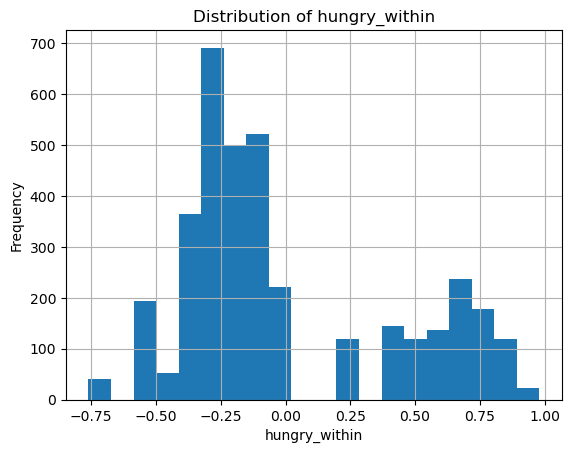

In [109]:
# hungry_within 컬럼의 값 확인
print(df['hungry_within'])
# hungry_within 컬럼의 요약 통계 정보
print(df['hungry_within'].describe())
# hungry_within 컬럼의 고유 값 확인
print(df['hungry_within'].unique())
import matplotlib.pyplot as plt

# 히스토그램 그리기
df['hungry_within'].hist(bins=20)
plt.title('Distribution of hungry_within')
plt.xlabel('hungry_within')
plt.ylabel('Frequency')
plt.show()


In [101]:
# 필요한 변수만 선택
variables = [
    'StudyID', 'Closest_CGM_Glucose', 'hungry_within', 
    'Positive_Emotion', 'Negative_Emotion'
]
df_filtered = df[variables]

# LMM 모델 정의
formula = "Closest_CGM_Glucose ~ hungry_within * Positive_Emotion * Negative_Emotion"

# LMM 모델 적합
model = mixedlm(formula, df_filtered, groups=df_filtered['StudyID'])
result = model.fit()

# 결과 출력
print(result.summary())


                            Mixed Linear Model Regression Results
Model:                      MixedLM          Dependent Variable:          Closest_CGM_Glucose
No. Observations:           3654             Method:                      REML               
No. Groups:                 74               Scale:                       328.6896           
Min. group size:            11               Log-Likelihood:              -15860.2070        
Max. group size:            74               Converged:                   Yes                
Mean group size:            49.4                                                             
---------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------------------------------
Intercept                                        97.502    2.044 47.704 0.000  93.496 10

In [103]:
# 필요한 변수만 선택
variables = [
    'StudyID', 'Closest_CGM_Glucose', 'hungry_within', 
    'Positive_Emotion', 'Negative_Emotion'
]
df_filtered = df_unique[variables]

# LMM 모델 정의
formula = "Closest_CGM_Glucose ~ hungry_within * Positive_Emotion * Negative_Emotion"

# LMM 모델 적합
model = mixedlm(formula, df_filtered, groups=df_filtered['StudyID'])
result = model.fit()

# 결과 출력
print(result.summary())


                            Mixed Linear Model Regression Results
Model:                      MixedLM          Dependent Variable:          Closest_CGM_Glucose
No. Observations:           3654             Method:                      REML               
No. Groups:                 74               Scale:                       328.6896           
Min. group size:            11               Log-Likelihood:              -15860.2070        
Max. group size:            74               Converged:                   Yes                
Mean group size:            49.4                                                             
---------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------------------------------
Intercept                                        97.502    2.044 47.704 0.000  93.496 10

# LMM2, 30분 평균 CGM으로 LMM2 (긍정/부정 정서+within)

In [95]:
# 필요한 변수만 선택
variables2 = [
    'StudyID', 'CGM_30min_mean', 'hungry_within', 
    'Positive_Emotion', 'Negative_Emotion'
]
df_filtered2 = df[variables2]

# LMM 모델 정의
formula = "CGM_30min_mean ~ hungry_within * Positive_Emotion * Negative_Emotion"

# LMM 모델 적합
model = mixedlm(formula, df_filtered2, groups=df_filtered2['StudyID'])
result = model.fit()

# 결과 출력
print(result.summary())

                            Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            CGM_30min_mean
No. Observations:            3654               Method:                        REML          
No. Groups:                  74                 Scale:                         321.0144      
Min. group size:             11                 Log-Likelihood:                -15818.9354   
Max. group size:             74                 Converged:                     Yes           
Mean group size:             49.4                                                            
---------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------------------------------
Intercept                                        96.932    2.045 47.405 0.000  92.925 10

In [97]:
#GE_binary 추가한 모델, word에는 위에거가 들어가있음
# 필요한 변수만 선택
variables = [
    'StudyID', 'CGM_30min_mean', 'hungry_within',
    'Positive_Emotion', 'Negative_Emotion', 'GE_binary'
]
df_filtered = df_unique[variables]

# LMM 모델 정의: GE_binary 추가
formula = "CGM_30min_mean ~ hungry_within * Positive_Emotion * Negative_Emotion + GE_binary"

# LMM 모델 적합
model2 = mixedlm(formula, df_filtered, groups=df_filtered['StudyID'])
result2 = model2.fit()

# 결과 출력
print(result2.summary())


                            Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            CGM_30min_mean
No. Observations:            3654               Method:                        REML          
No. Groups:                  74                 Scale:                         321.0894      
Min. group size:             11                 Log-Likelihood:                -15817.9151   
Max. group size:             74                 Converged:                     Yes           
Mean group size:             49.4                                                            
---------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------------------------------
Intercept                                        97.219    2.269 42.838 0.000  92.771 10